In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install autoNLP
!pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 7.9 MB/s 
     |████████████████████████████████| 264 kB 67.2 MB/s 
     |████████████████████████████████| 61 kB 8.4 MB/s 
     |████████████████████████████████| 57 kB 5.7 MB/s 
     |████████████████████████████████| 212 kB 73.4 MB/s 
     |████████████████████████████████| 115 kB 69.5 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: prettytable
    Found existing installation: prettytable 3.5.0
    Uninstalling prettytable-3.5.0:
      Successfully uninstalled prettytable-3.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-

In [3]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 32.4 MB/s 


In [5]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 34.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-ensemble 0.1.7 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.


In [6]:
import neattext as nt
import pandas as pd
import numpy as np
import neattext.functions as nfx
from sklearn.feature_extraction.text import CountVectorizer 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost.sklearn import XGBClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

#from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional, Embedding, Dropout, Flatten, Layer, Input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv(r"/content/drive/MyDrive/mini_pro/data/li.csv.xls")

In [9]:
df.head()

,content,score,at
0,Very good plateform,5,2022-09-13 18:33:13
1,Good but not nice,4,2022-09-13 18:32:54
2,Great app for making new connections.Finding j...,5,2022-09-13 18:17:27
3,Great for work,5,2022-09-13 16:35:21
4,If I could give it a million negative stars I ...,1,2022-09-13 16:29:41


In [10]:
df.columns

Index(['content', 'score', 'at'], dtype='object')

In [11]:
df=df[["content","score"]]

In [12]:
df.iloc[20]["content"]

'Excellent experience..but I want to add my Gmail ID in LinkedIn hw can I change it.'

- converting the data into lower case 

In [13]:
# Lowering the text
df['content']= df['content'].apply(lambda x: x.lower())

In [14]:
df.iloc[20]["content"]

'excellent experience..but i want to add my gmail id in linkedin hw can i change it.'

**task**
- Removal Punctuation 
- remove html tags
- Remove special character 
- remove userhandels / mentions
- remove hastags
- remove stopwords


In [15]:
# method/attributes
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [16]:
# methos /attributes  of nfx
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [17]:
df.iloc[20]["content"]

'excellent experience..but i want to add my gmail id in linkedin hw can i change it.'

## function approch

In [18]:
df.head()


,content,score
0,very good plateform,5
1,good but not nice,4
2,great app for making new connections.finding j...,5
3,great for work,5
4,if i could give it a million negative stars i ...,1


In [19]:
df['Clean_Text']=df.content.apply(nfx.remove_userhandles)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_stopwords)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_hashtags)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_special_characters)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_emojis)

In [20]:
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_phone_numbers)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_currencies)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_dates)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_urls)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_emails)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_currency_symbols)
df['Clean_Text']=df.Clean_Text.apply(nfx.fix_contractions)

In [21]:
df.iloc[65]["content"]

'the sponsored messages that notify like real ones got this app deleted again. i\'ll probably reinstall it later to approve a single friend request to connect them to my network, but i hate this app with every fiber of my being. "do you know x?" "x got a new job" "x people who like the same \'whatever\' as you thought this was a good article. wanna read it?" no. no i don\'t. i hate this app. this is what happens when myspace doesn\'t get bought. this is only installed cause marines need my network.'

In [22]:
df.iloc[65]["Clean_Text"]

'sponsored messages notify like real ones got app deleted again ill probably reinstall later approve single friend request connect network hate app fiber being do know x x got new job x people like whatever thought good article wanna read it no dont hate app happens myspace bought installed cause marines need network'

In [23]:
df.head()

,content,score,Clean_Text
0,very good plateform,5,good plateform
1,good but not nice,4,good nice
2,great app for making new connections.finding j...,5,great app making new connectionsfinding jobs s...
3,great for work,5,great work
4,if i could give it a million negative stars i ...,1,million negative stars would tried reenter wor...


In [24]:
# Preview some of the pairs of questions
a = 0 
for i in range(a,a+10):
    print(df.Clean_Text[i])
    print()

good plateform

good nice

great app making new connectionsfinding jobs specially experienced lot knowledge exchange

great work

million negative stars would tried reenter workforce disability legitimate account hacked offered job ended losing entire bank account money scrambling job before maybe vet posted jobs better connected support instructed helpful

linkedin good detailed app time downloaded phone uninstalled it recently installed cant sign in inputting email password theyll tell verify code sent mail end telling unable verify given stars cant

interior designer interior draftsman interior site supervisor interior shop saleman job world list

freebies degraded app

app good open anymore why opens closes immediately that

wonderful experience



In [25]:
import seaborn as sns

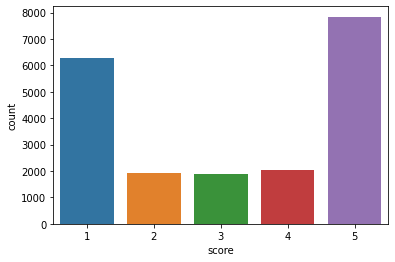

In [26]:
sns.countplot(x = 'score', data = df)

In [27]:
df.describe() #descriptive statistics

,score
count,20000.000000
mean,3.161300
std,1.732147
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


## droping duplicate

In [28]:
df.duplicated().sum()

35

In [29]:
df.shape

(20000, 3)

In [30]:
df=df.drop_duplicates()

In [31]:
df.shape

(19965, 3)

##visualization 

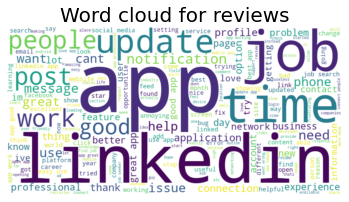

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

allwords = ' '.join([rev for rev in df['Clean_Text']])
wordcloud = WordCloud(width = 1200, height = 600, random_state = 23, background_color="white").generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for reviews',fontsize = 20)
plt.show()

In [33]:
from textblob import TextBlob
df['polarity'] = df.content.apply(lambda x: TextBlob(x).polarity)
df['subjectivity'] = df.content.apply(lambda x: TextBlob(x).subjectivity)

df.head()

,content,score,Clean_Text,polarity,subjectivity
0,very good plateform,5,good plateform,0.910000,0.780000
1,good but not nice,4,good nice,0.200000,0.800000
2,great app for making new connections.finding j...,5,great app making new connectionsfinding jobs s...,0.523377,0.668994
3,great for work,5,great work,0.800000,0.750000
4,if i could give it a million negative stars i ...,1,million negative stars would tried reenter wor...,0.175000,0.506250


In [34]:
df['sentiment'] = np.where(df.polarity > 0, 'positive', np.where(df.polarity < 0, 'negative', 'neutral'))
#converting target variable to numeric labels
df.sentiment = [ 1 if each == "positive" else 0 for each in df.sentiment]
df.head()

,content,score,Clean_Text,polarity,subjectivity,sentiment
0,very good plateform,5,good plateform,0.910000,0.780000,1
1,good but not nice,4,good nice,0.200000,0.800000,1
2,great app for making new connections.finding j...,5,great app making new connectionsfinding jobs s...,0.523377,0.668994,1
3,great for work,5,great work,0.800000,0.750000,1
4,if i could give it a million negative stars i ...,1,million negative stars would tried reenter wor...,0.175000,0.506250,1


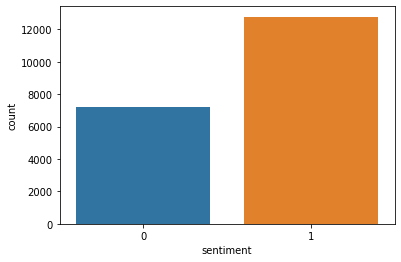

In [35]:
sns.countplot(x = 'sentiment', data = df)

In [36]:
# Shows the top 5 tweets with highest polarity scores
df.nlargest(10,'polarity')[['content','Clean_Text']]

,content,Clean_Text
9,it has been a wonderful experience👏🏽,wonderful experience
20,excellent experience..but i want to add my gma...,excellent experiencebut want add gmail id link...
59,linkedin is one of the best platform to connec...,linkedin best platform connect like minded peo...
126,linkedin is good for learning and upgradation ...,linkedin good learning upgradation career poi...
140,excellent media port and information,excellent media port information
142,best app in the world 🌍,best app world
168,best app i ever seen,best app seen
173,it's the best app to discover jobs,best app discover jobs
198,linkin is a awesome app,linkin awesome app
215,it's an excellent tool for anyone in the job m...,excellent tool job market


In [37]:
# Shows the top 5 tweets with lowest polarity scores
df.nsmallest(10,'polarity')[['content','Clean_Text']]

,content,Clean_Text
150,worst app always showing error while updating ...,worst app showing error updating profile reason
864,"terrible app, i keep getting fake/spam emails ...",terrible app getting fakespam emails job recom...
994,lots of scammers on linkedin requesting to con...,lots scammers linkedin requesting connect days...
1246,worst app ask for premium,worst app ask premium
1292,one of the worst app i've ever seen always sto...,worst app ive seen stopping cant recommendatio...
1336,pathetic. if i had an option i would have give...,pathetic option given stars all
1594,so incessantly asking to update the app. that ...,incessantly asking update app annoying
1815,"horrible , women soliciting and to meaning pop...",horrible women soliciting meaning pop job del...
1837,this is the worst app in the world please dont...,worst app world dont waist time download app
2315,if any job posted from recruter than we can't ...,job posted recruter cant applying linkden best...


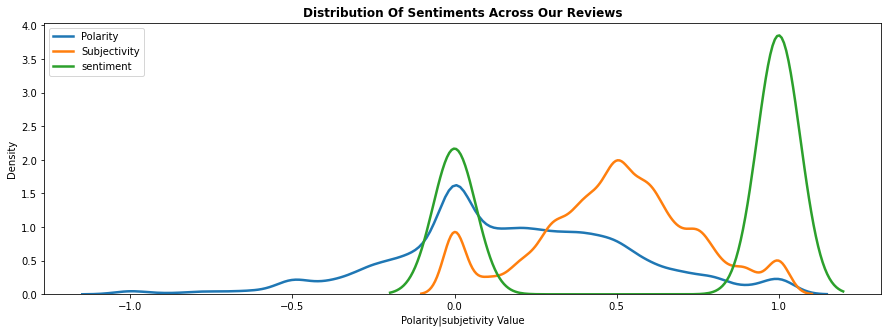

In [38]:
plt.figure(figsize=(15,5))
plt.title('Distribution Of Sentiments Across Our Reviews',fontsize=12,fontweight='bold')
sns.kdeplot(df['polarity'], label='Polarity', lw=2.5)
sns.kdeplot(df['subjectivity'], label='Subjectivity', lw=2.5)
sns.kdeplot(df['sentiment'], label='sentiment', lw=2.5)

plt.xlabel('Polarity|subjetivity Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
# Display the generated image:

plt.legend()
plt.show()

In [39]:
print('Positive reviews are', (round(df['sentiment'].value_counts()[0])),'i.e.', round(df['sentiment'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Negative reviews are', (round(df['sentiment'].value_counts()[1])),'i.e.',round(df['sentiment'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Positive reviews are 7189 i.e. 36.01 % of the dataset
Negative reviews are 12776 i.e. 63.99 % of the dataset


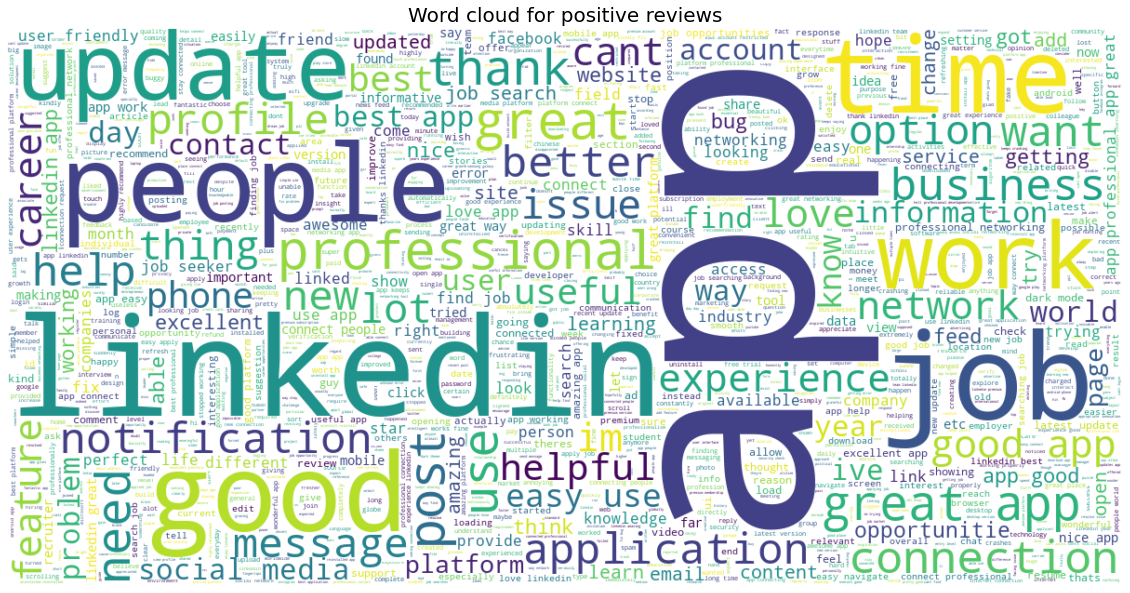

In [40]:
from wordcloud import WordCloud
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['Clean_Text']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

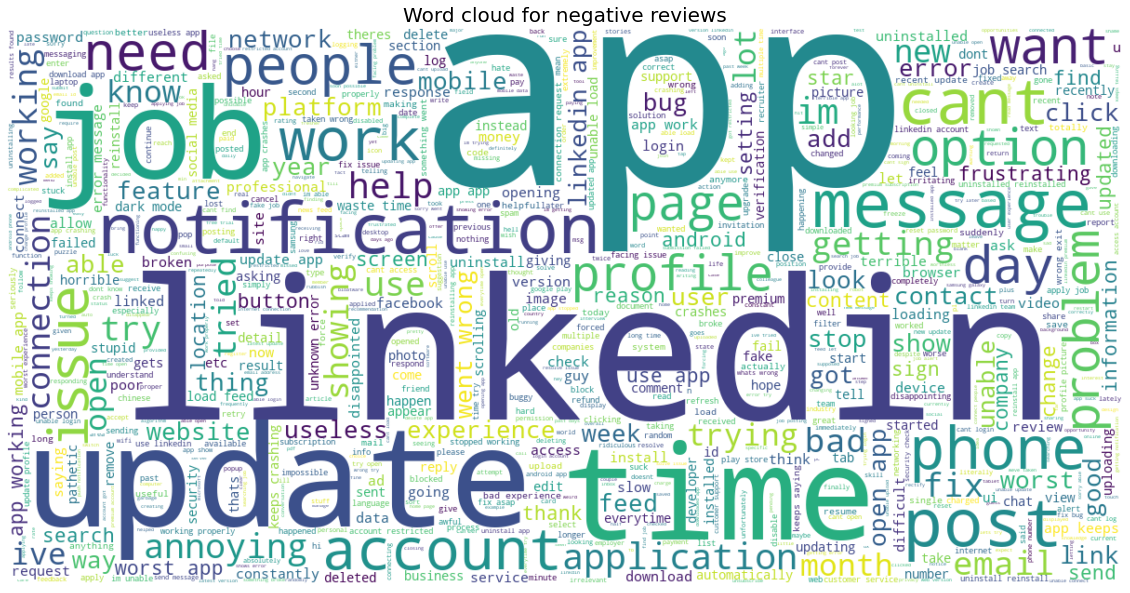

In [41]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['Clean_Text']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

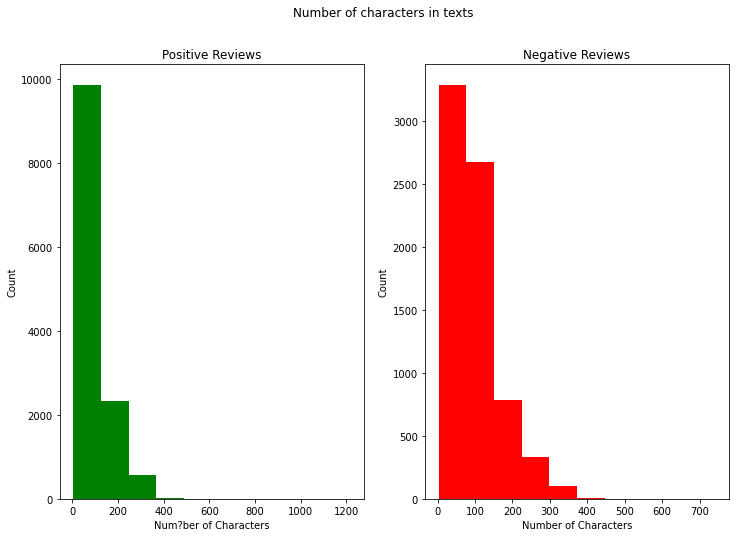

In [42]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Num?ber of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

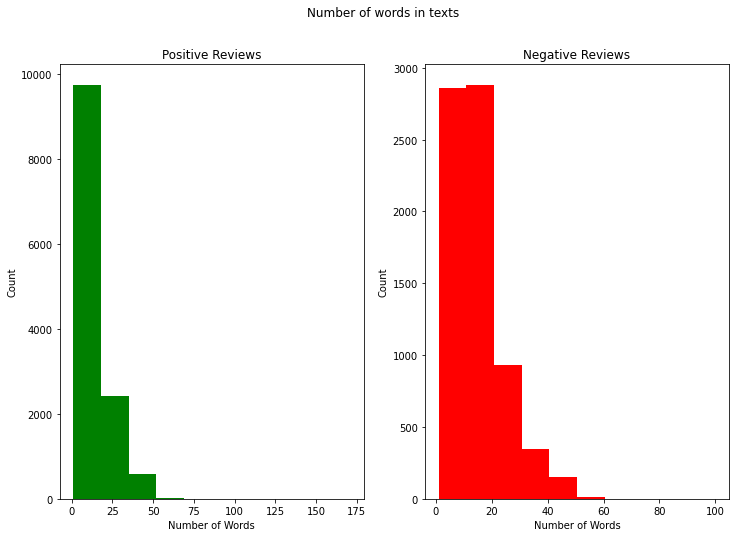

In [43]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

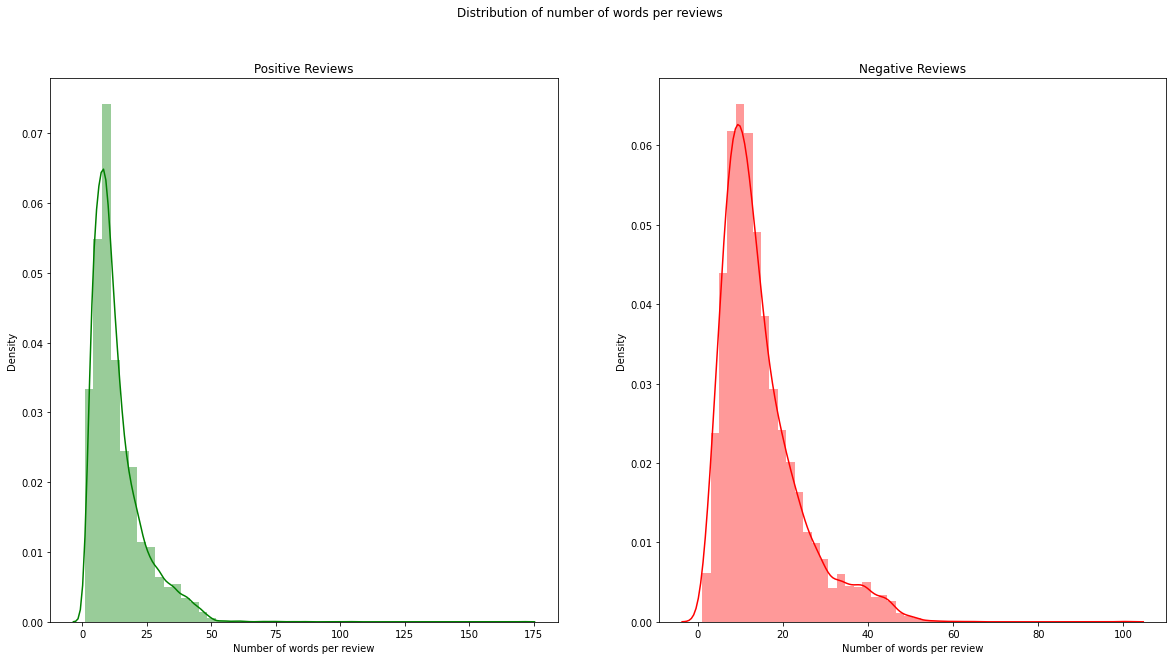

In [44]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

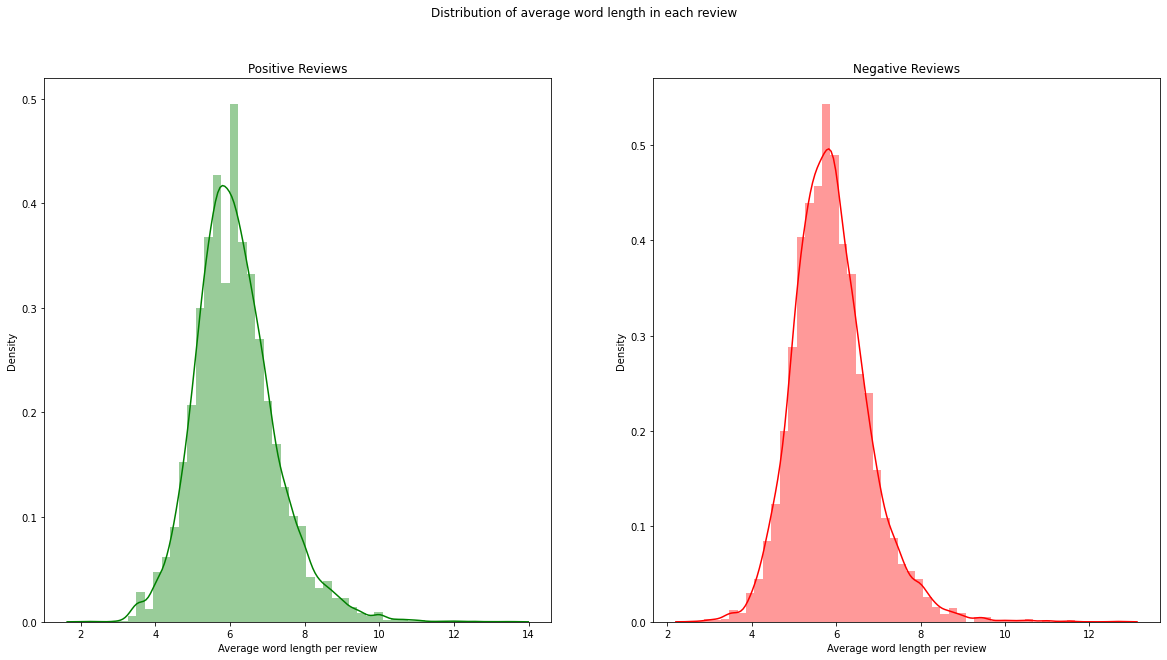

In [45]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Average word length per review')
word = negative_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Average word length per review')
fig.suptitle('Distribution of average word length in each review')
plt.show()

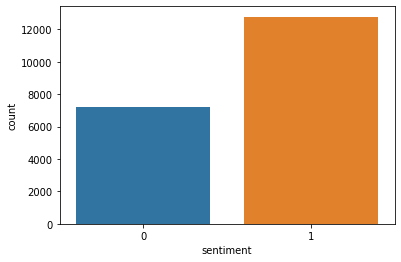

In [46]:
sns.countplot(x = 'sentiment', data = df)

In [47]:
df.columns

Index(['content', 'score', 'Clean_Text', 'polarity', 'subjectivity',
       'sentiment'],
      dtype='object')

In [48]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.Clean_Text)
corpus[:5]

['good', 'plateform', 'good', 'nice', 'great']

In [49]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

,corpus,countv
0,app,12399
1,linkedin,4527
2,job,3303
3,good,2508
4,great,2496
5,use,1999
6,people,1989
7,update,1905
8,cant,1780
9,like,1773


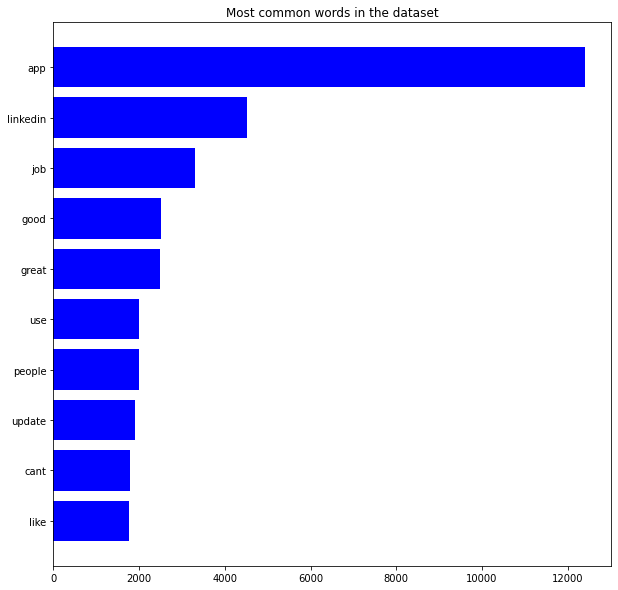

In [50]:
most_common = most_common.sort_values('countv')
plt.figure(figsize =(10,10))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'blue')
plt.title('Most common words in the dataset')
plt.show()

In [51]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

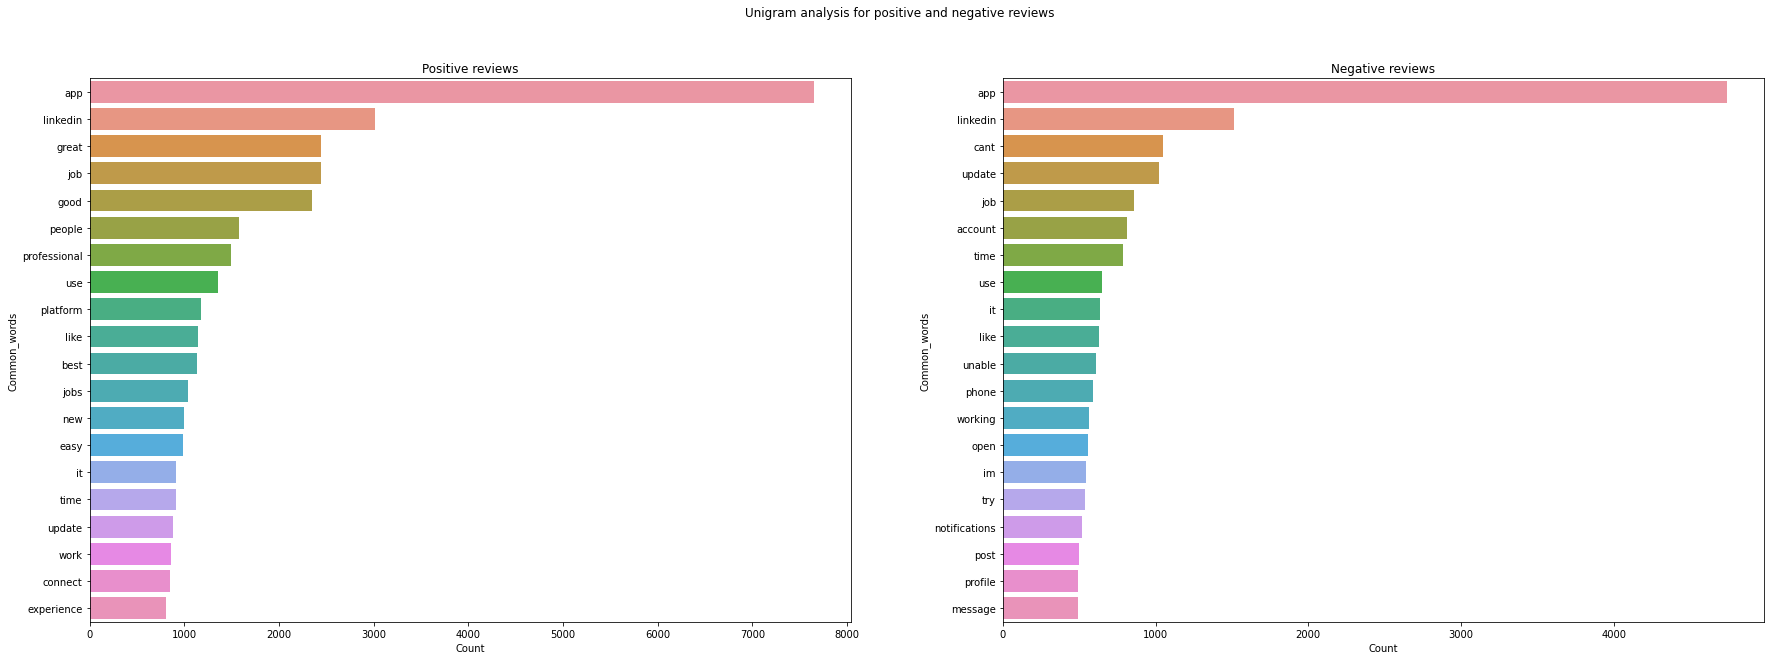

In [52]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30, 10))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()

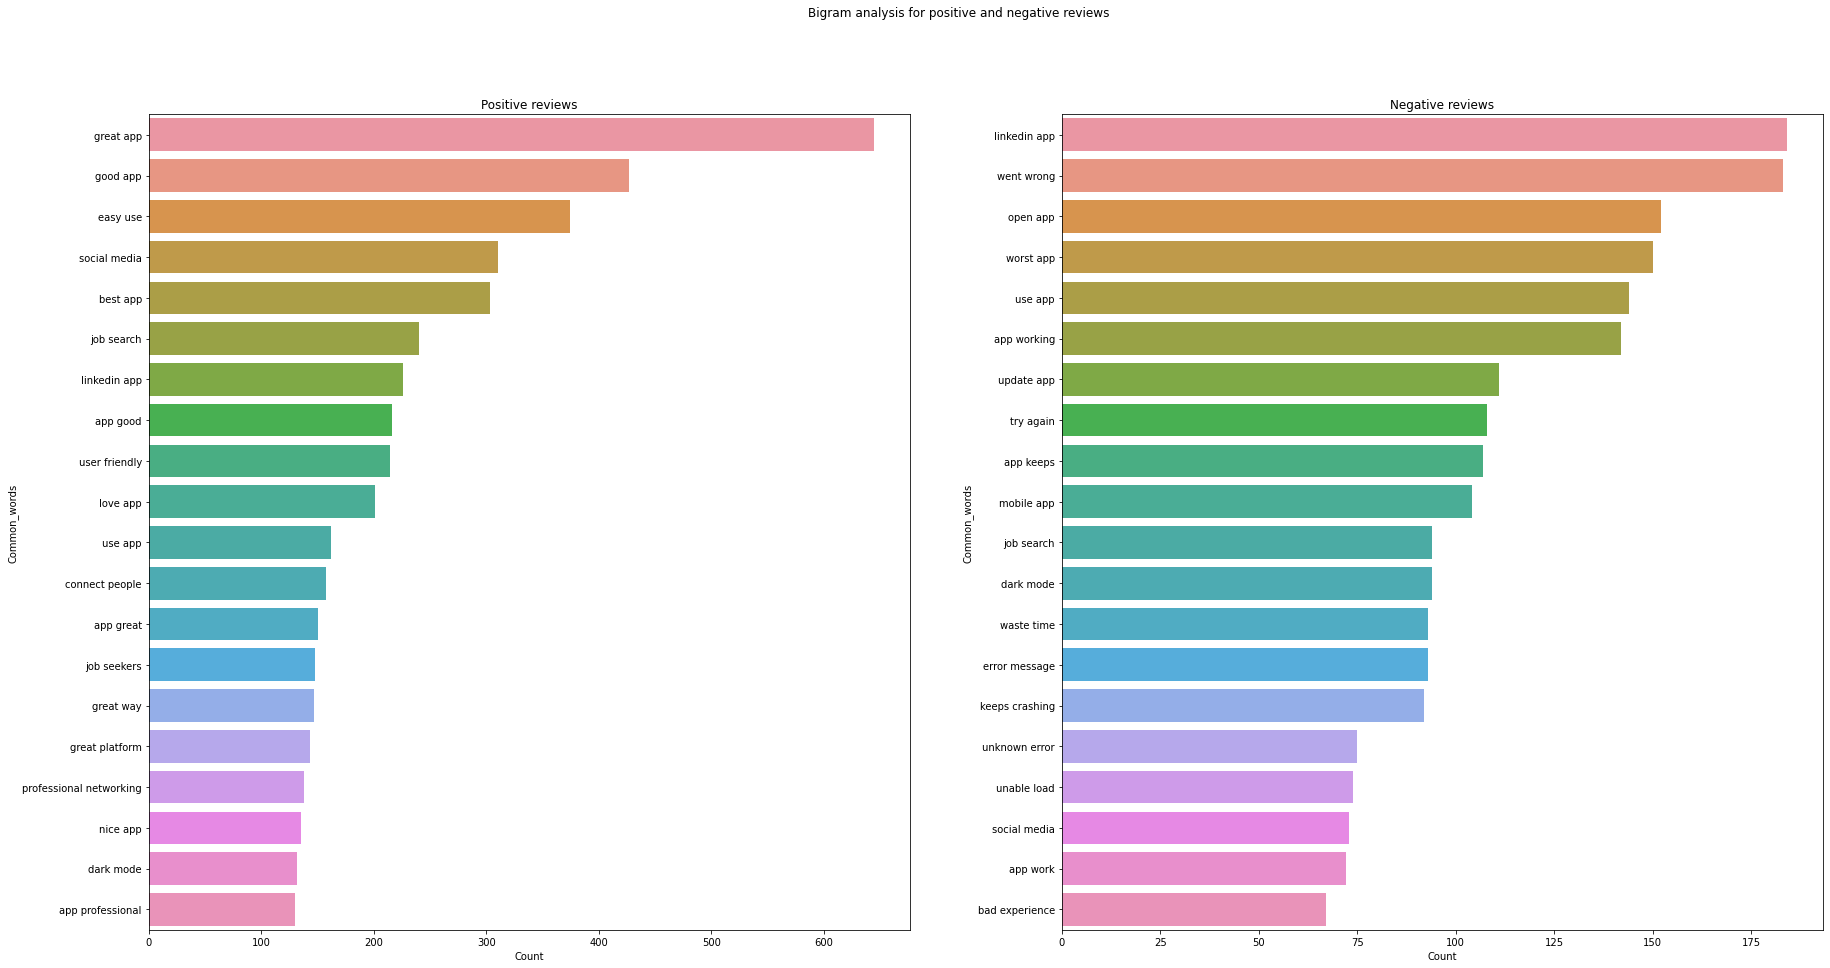

In [53]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

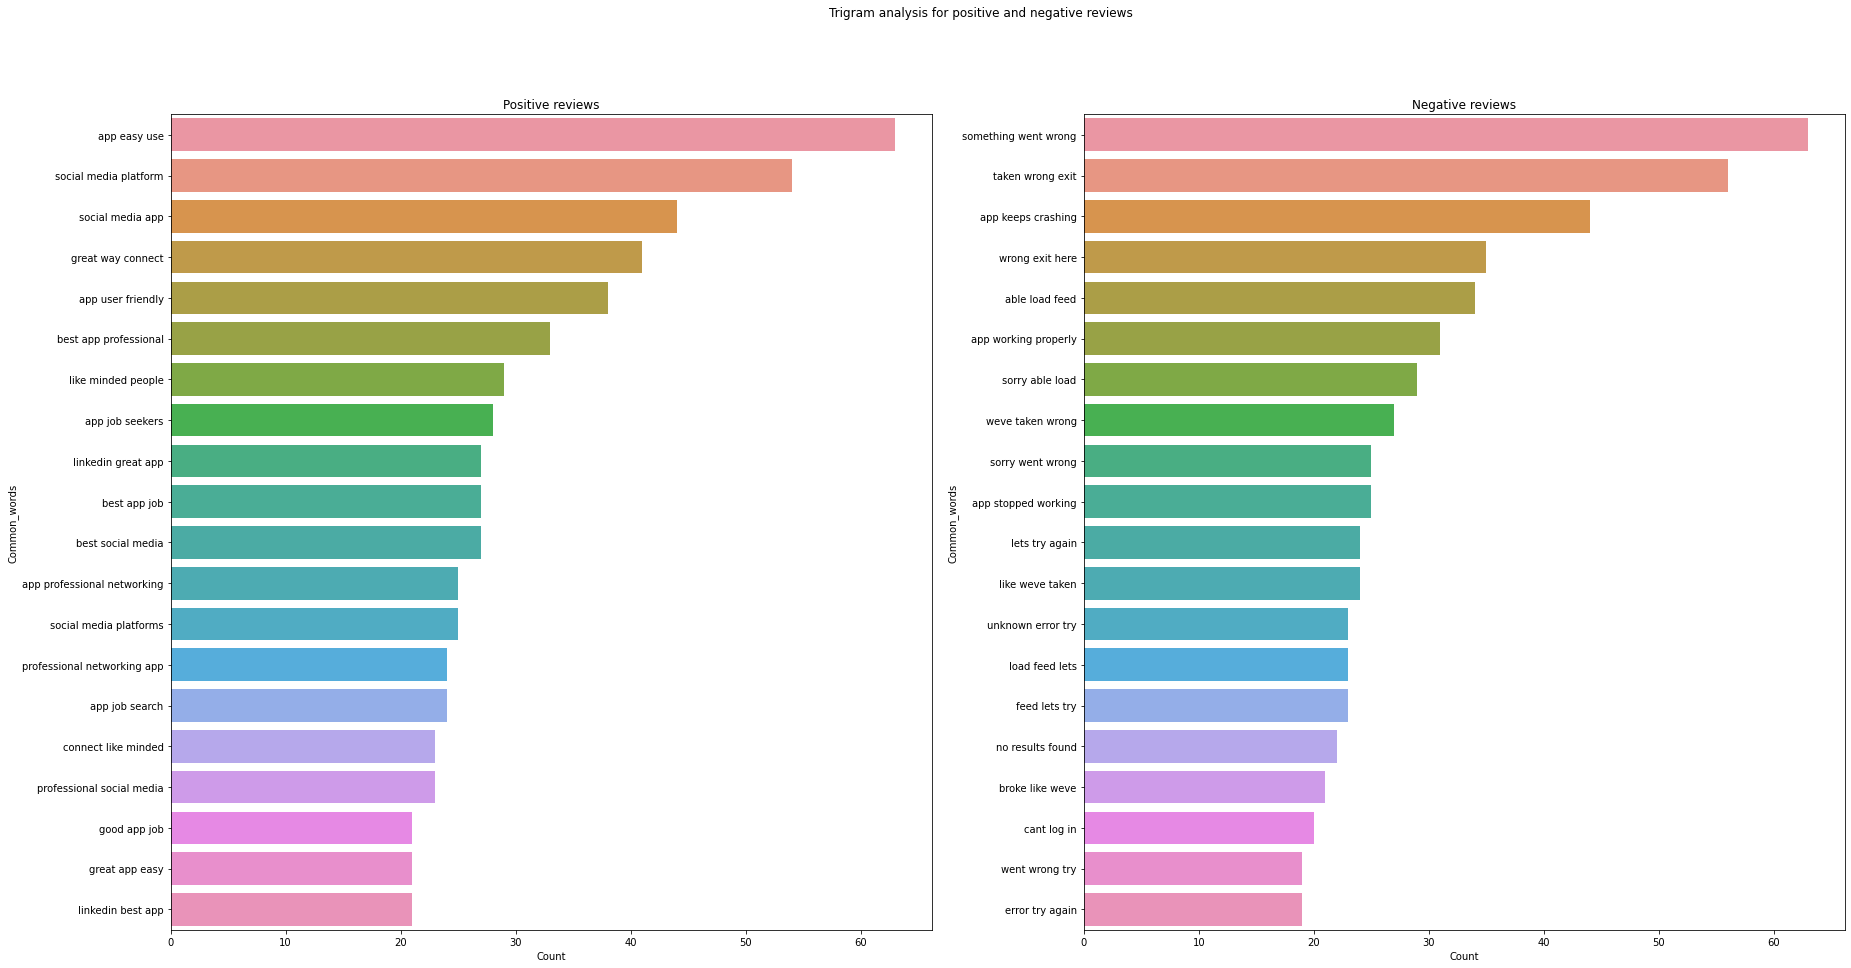

In [54]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [55]:
df.head()

,content,score,Clean_Text,polarity,subjectivity,sentiment
0,very good plateform,5,good plateform,0.910000,0.780000,1
1,good but not nice,4,good nice,0.200000,0.800000,1
2,great app for making new connections.finding j...,5,great app making new connectionsfinding jobs s...,0.523377,0.668994,1
3,great for work,5,great work,0.800000,0.750000,1
4,if i could give it a million negative stars i ...,1,million negative stars would tried reenter wor...,0.175000,0.506250,1


In [56]:
df.rename(columns = {'Clean_Text':'review'}, inplace = True)

In [57]:
df.head()

,content,score,review,polarity,subjectivity,sentiment
0,very good plateform,5,good plateform,0.910000,0.780000,1
1,good but not nice,4,good nice,0.200000,0.800000,1
2,great app for making new connections.finding j...,5,great app making new connectionsfinding jobs s...,0.523377,0.668994,1
3,great for work,5,great work,0.800000,0.750000,1
4,if i could give it a million negative stars i ...,1,million negative stars would tried reenter wor...,0.175000,0.506250,1


## splitting into train and test

In [58]:

train, test= train_test_split(df, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']

In [59]:
train, test = train_test_split(df, test_size=0.2)

## Model building

In [60]:
from autoviml.Auto_NLP import Auto_NLP

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Auto NLP processing on NLP Column: review
Shape of Train Data: 15972 rows
    Shape of Test Data: 3993 rows


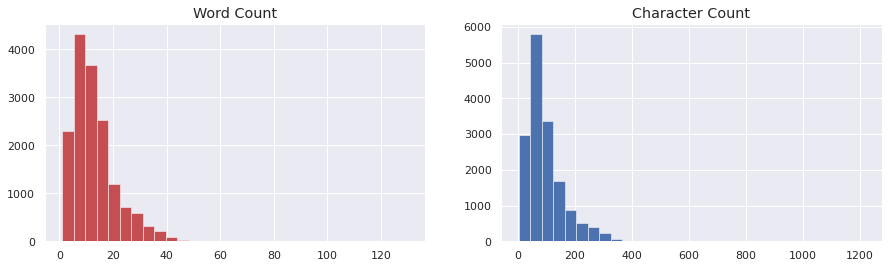

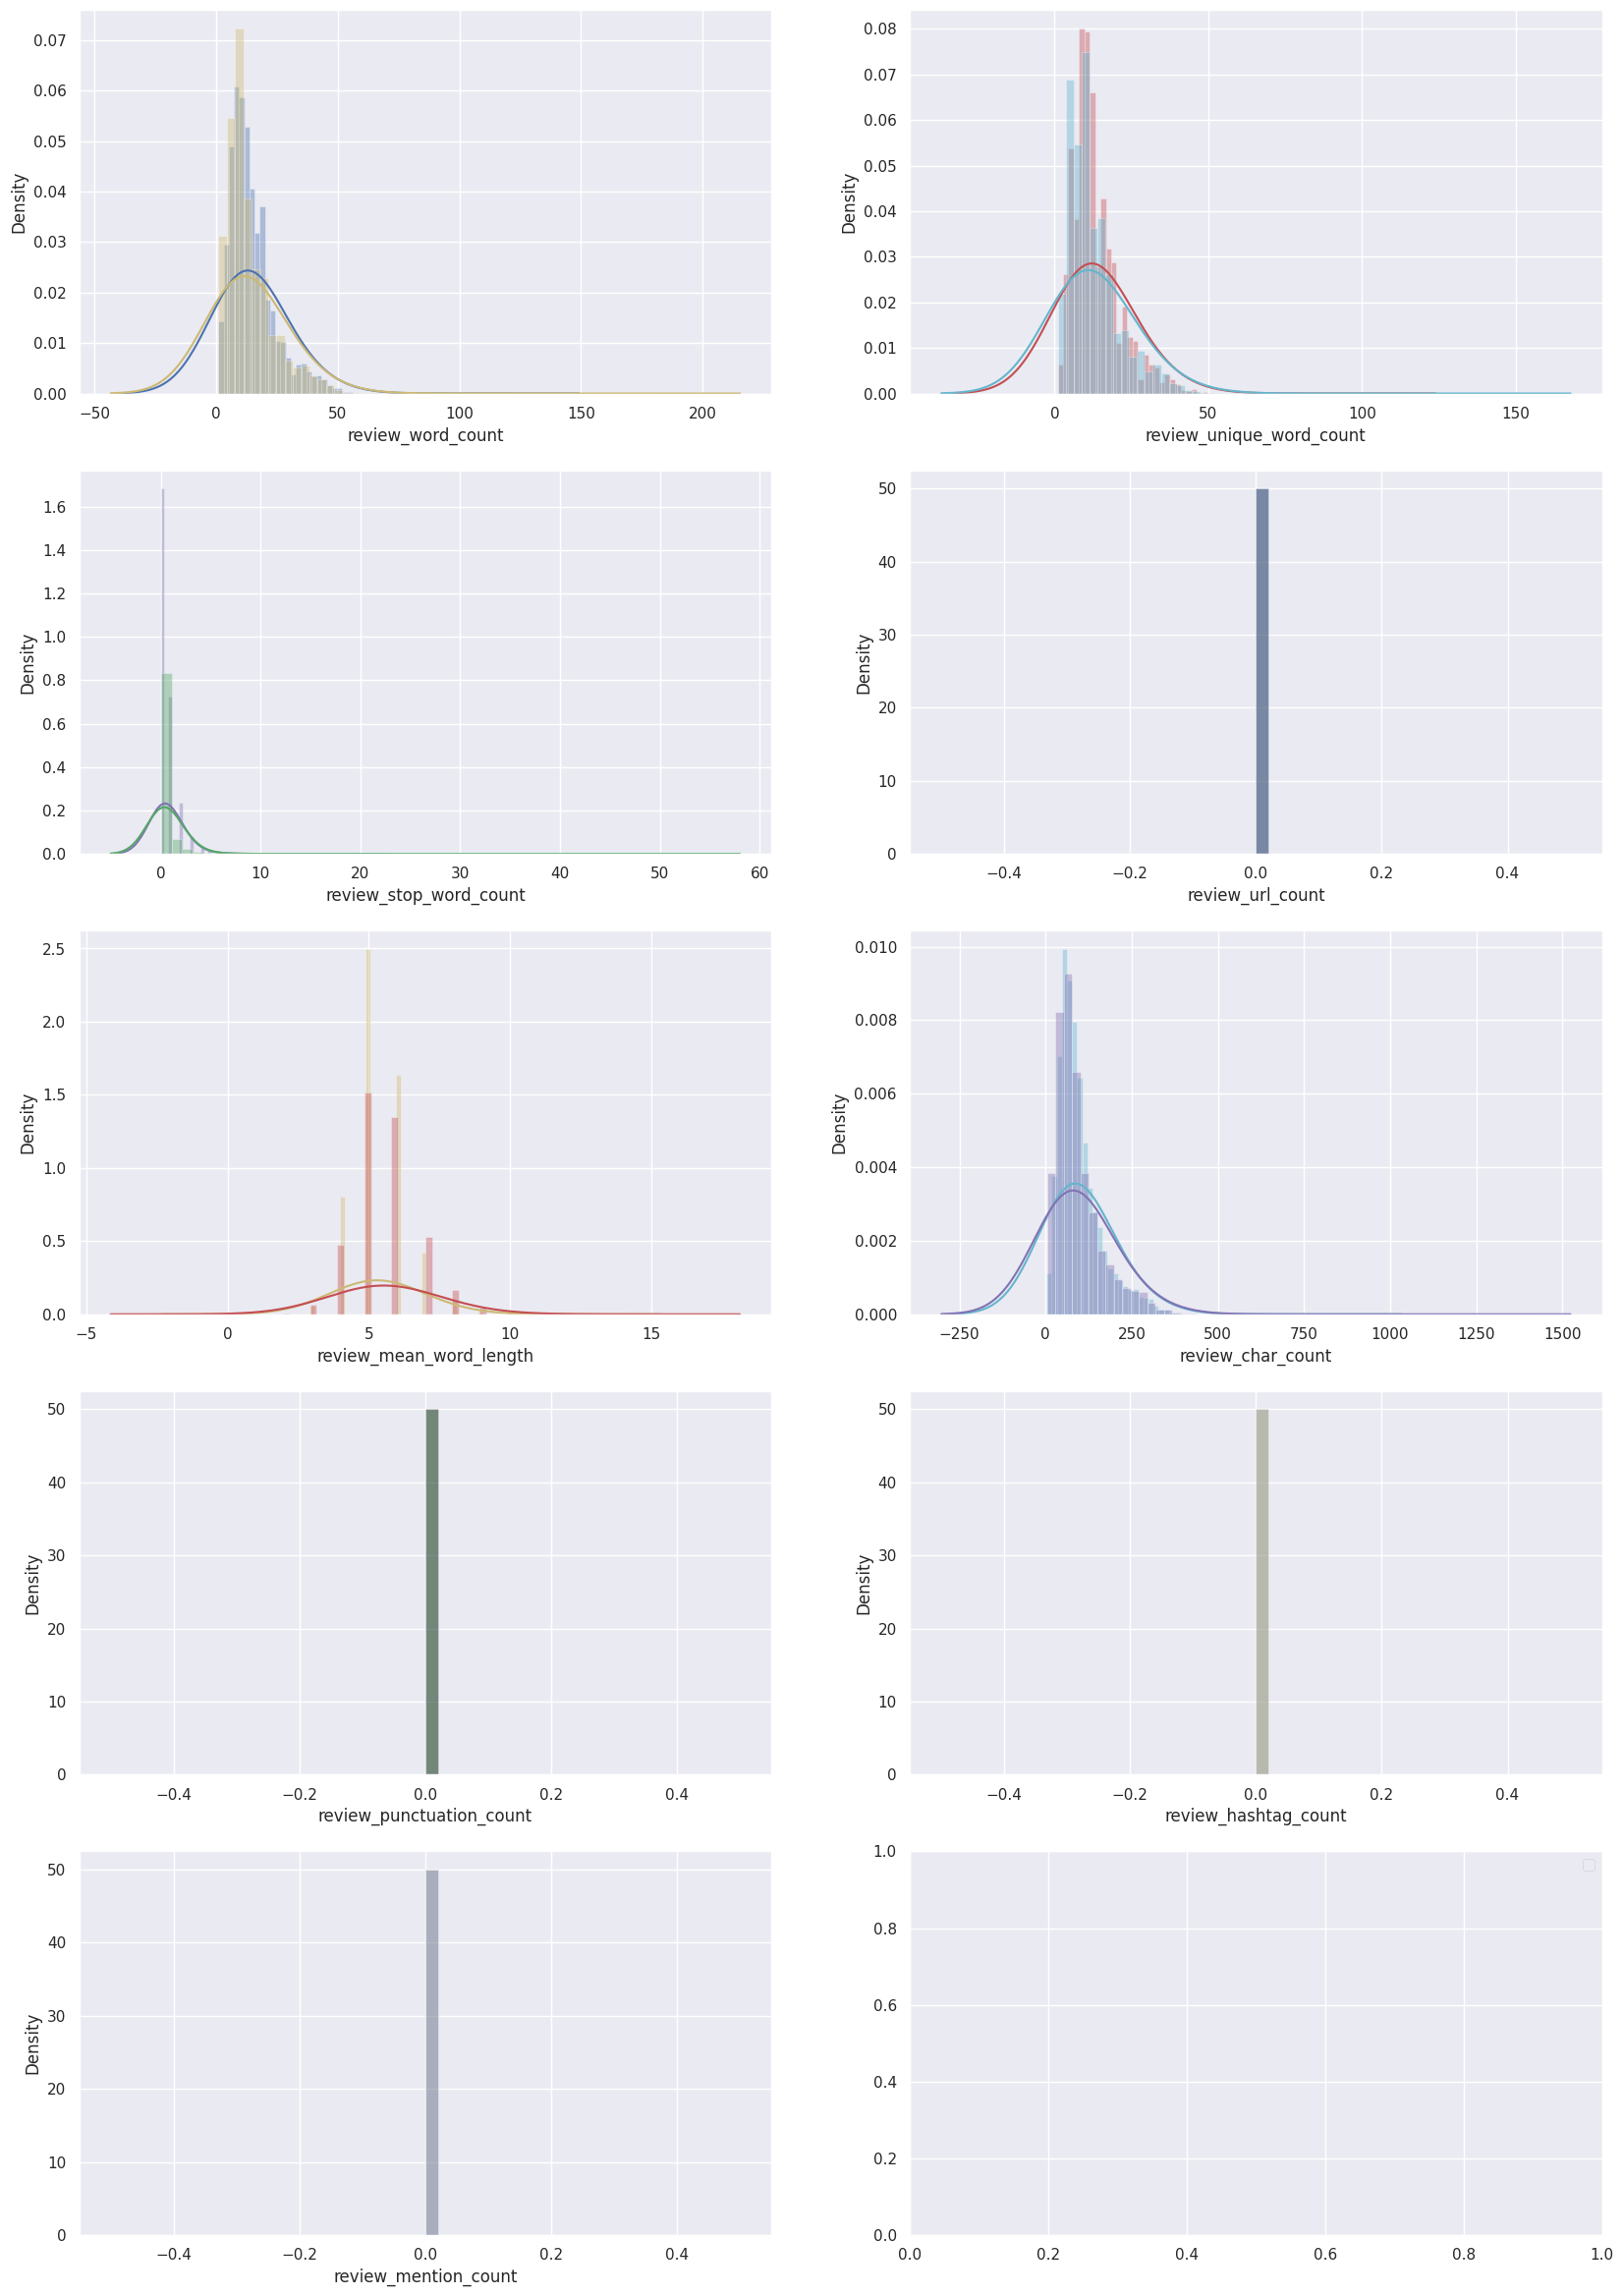

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for review column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 15 seconds

For target = sentiment

    For class = 0
Top 200 n-grams
: ['updat', 'work', 'linkedin', 'tri', 'cant', 'time', 'job', 'open', 'messag', 'notif', 'use', 'show', 'unabl', 'account', 'post', 'phone', 'issu', 'load', 'connect', 'crash', 'fix', 'uninstal', 'like', 'keep', 'profil', 'error', 'abl', 'wrong', 'im', 'help', 'reinstal', 'day', 'page', 'problem', 'need', 'annoy', 'stop', 'send', 'experi', 'instal', 'want', 'mobil', 'worst', 'search', 'bad', 'feed', 'link', 'peopl', 'option', 'upload', 'chang', 'download', 'login', 'email', 'look', 'find', 'know', 'fail', 'useless', 'new', 'version', 'bug', 'network', 'sign', 'let', 'access', 'year', 'ive', 'went', 'week', 'recent', 'ask', 'month', 'contact', 'click', 'happen',

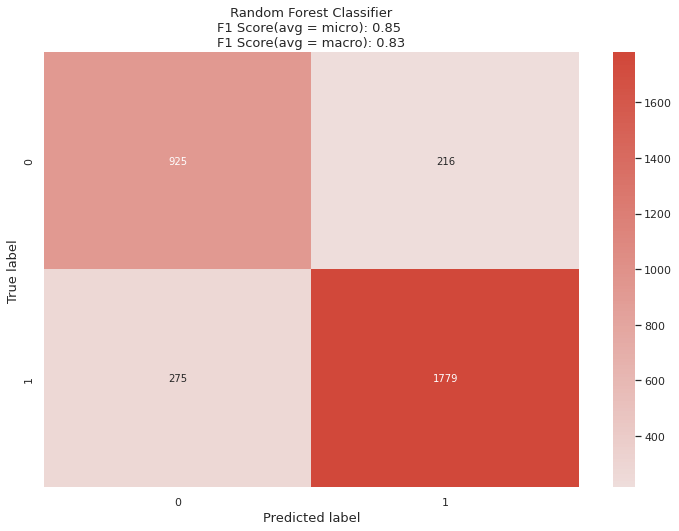

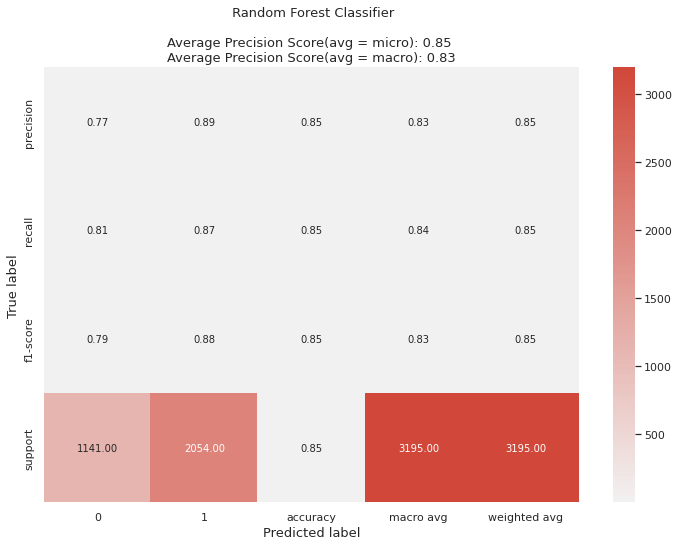

  Now transforming Train data to return as output...
  Transforming Test data to return as output...
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
Training completed. Time taken for Auto_NLP = 24.1 minutes


In [61]:
nlp_column = 'review'
target = 'sentiment'

train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(nlp_column, train, test, target, score_type='balanced_accuracy', modeltype='Classification', top_num_features=500, verbose = 2, build_model=True
)

In [62]:
nlp_transformer.predict(test_nlp[nlp_column])

array([0, 1, 0, ..., 0, 1, 0])

In [63]:
nlp_transformer.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function Auto_NLP.<locals>.<lambda> at 0x7f332663bef0>)),
                ('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.7850586191221081, max_features=2351,
                                 min_df=2, ngram_range=(1, 3),
                                 sublinear_tf=True, token_pattern='\\w{1,}')),
                ('selectkbest',
                 SelectKBest(k=2351,
                             score_func=<function chi2 at 0x7f333125c830>)),
                ('calibratedclassifiercv',
                 CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=200,
                                                                              n_jobs=-1,
                                                                              random_state=99),
                                        cv=3, method='isotonic'))])>

In [64]:
test_nlp['label'] = nlp_transformer.predict(test_nlp[nlp_column])

In [65]:
test_nlp

,content,score,review,polarity,subjectivity,sentiment,review_word_count,review_unique_word_count,review_stop_word_count,review_url_count,review_mean_word_length,review_char_count,review_punctuation_count,review_hashtag_count,review_mention_count,aap,abil,abl,abl access,abl connect,abl find,abl load,abl load feed,abl login,abl open,abl post,abl send,abl sign,abl updat,abl upload,abl use,abl use applic,absolut,accept,access,access account,access applic,access linkedin,accid,accord,account,account applic,account linkedin,account reason,account restrict,account tri,accur,achiev,act,action,...,work day,work experi,work fine,work good,work great,work home,work like,work linkedin,work month,work perfectli,work phone,work profess,work properli,work relat,work time,work tri,work updat,work week,work well,work work,worker,world,worldwid,worst,worst applic,worst experi,worth,worthless,wow,write,written,wrong,wrong applic,wrong exit,wrong exit here,wrong tri,wrote,x,ye,year,year ago,year experi,yesterday,yet,young,your,youtub,yr,zero,label
10007,the scrolling in the network page is just awefull. can't stop the scroll. it just keeps going and then just jumps to a point you try to stop the scrolling at.,3,scrolling network page awefull cant stop scroll keeps going jumps point try stop scrolling at,0.00,0.00,0,15,13,1,0,5,93,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
18954,"what happened? isnt the best app i cant use linkedin, am only able to view profile",2,happened isnt best app cant use linkedin able view profile,0.50,0.64,1,10,10,0,0,4,58,0,0,0,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1448,very bad experience. no one litsen when the machine wants maintenance. i urge pls don't buy any eureka products.,1,bad experience litsen machine wants maintenance urge pls buy eureka products,-0.35,0.48,0,11,11,0,0,6,76,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2128,"when i am reading a post and leave app without closing completly, then , when i return to app, it does update even i do not do any swipe down or anything. the post is lost, which i was reading, cannot get that again!! it is bit annoying",2,reading post leave app closing completly return app update swipe anything post lost reading again bit annoying,-0.52,0.59,0,18,15,2,0,5,111,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
11947,"first, bugs on messaging icon where there is always a number (new message) but when i clicked on it, there is no new message showed up. second,

In [66]:
df

,content,score,review,polarity,subjectivity,sentiment
0,very good plateform,5,good plateform,0.91,0.78,1
1,good but not nice,4,good nice,0.20,0.80,1
2,great app for making new connections.finding jobs specially if you are experienced and a lot of knowledge exchange.,5,great app making new connectionsfinding jobs specially experienced lot knowledge exchange,0.52,0.67,1
3,great for work,5,great work,0.80,0.75,1
4,"if i could give it a million negative stars i would. i tried to re-enter the workforce after disability. a legitimate account that had been hacked offered me a job. i ended up losing my entire bank account and have had no money, scrambling even more for a job than before. maybe vet the posted jobs better? connected support as instructed, it was beyond not helpful.",1,million negative stars would tried reenter workforce disability legitimate account hacked offered job ended losing entire bank account money scrambling job before maybe vet posted jobs better connected support instructed helpful,0.17,0.51,1
...,...,...,...,...,...,...
19995,"too many connection errors. no connection on some networks, when other messengers work. too many notifications.",3,connection errors connection networks messengers work notifications,0.29,0.46,1
19996,its uses lots of data but not run properly very slow app other app runs good but it run very slow it loaded slow videos and content youtube runs good no buffering but it is having lots of buffering thats why i m not using it frequently very disappointing app now i am thinking why i had made profile on it,1,uses lots data run properly slow app app runs good run slow loaded slow videos content youtube runs good buffering lots buffering thats frequently disappointing app thinking profile,-0.08,0.56,0
19997,"access to linkedin at my fingertips. what's not to like, except maybe a lower price on their 'premium' account. if it costs more than a netflix subscription, i'm not buying.",4,access linkedin fingertips whats like maybe lower price premium account costs netflix subscription im buying,0.50,0.50,1
19998,"a decent professional platform, that shouldn't fall for gimmicks like recording videos etc to sell better",5,decent professional platform fall gimmicks like recording videos etc sell better,0.26,0.42,1


In [67]:
#Vectorizing data

tfidf_vect = TfidfVectorizer() #tfidfVectorizer
Xtrain_tfidf = tfidf_vect.fit_transform(Xtrain)
Xtest_tfidf = tfidf_vect.transform(Xtest)
count_vect = CountVectorizer() # CountVectorizer
Xtrain_count = count_vect.fit_transform(Xtrain)
Xtest_count = count_vect.transform(Xtest)

Logistic Regression Accuracy : 85.78%
[[1143  303]
 [ 265 2282]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1446
           1       0.88      0.90      0.89      2547

    accuracy                           0.86      3993
   macro avg       0.85      0.84      0.85      3993
weighted avg       0.86      0.86      0.86      3993



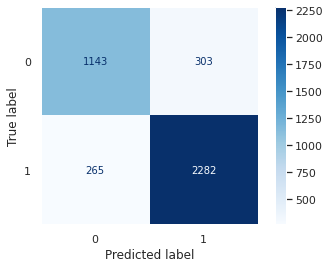

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
lr = LogisticRegression()
lr.fit(Xtrain_tfidf,ytrain)
p1=lr.predict(Xtest_tfidf)
s1=accuracy_score(ytest,p1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
print(confusion_matrix(ytest, p1))
print(metrics.classification_report(ytest, p1))

Linear Support Vector Classifier Accuracy : 86.15%
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1446
           1       0.90      0.88      0.89      2547

    accuracy                           0.86      3993
   macro avg       0.85      0.85      0.85      3993
weighted avg       0.86      0.86      0.86      3993



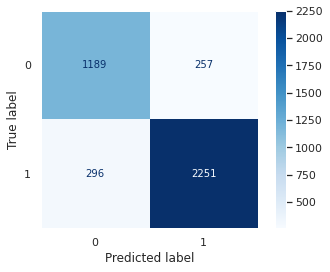

In [69]:
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(Xtrain_tfidf,ytrain)
p3=linear_svc.predict(Xtest_tfidf)
s3=accuracy_score(ytest,p3)
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(linear_svc, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p3))

XGBoost Accuracy : 86.25%
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1446
           1       0.92      0.86      0.89      2547

    accuracy                           0.86      3993
   macro avg       0.85      0.86      0.85      3993
weighted avg       0.87      0.86      0.86      3993



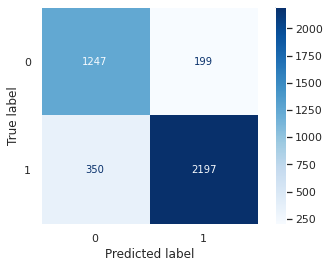

In [70]:
xgbo = XGBClassifier()
xgbo.fit(Xtrain_tfidf,ytrain)
p4=xgbo.predict(Xtest_tfidf)
s4=accuracy_score(ytest,p4)
print("XGBoost Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p4))

Random Forest Accuracy : 86.25%
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1446
           1       0.89      0.86      0.87      2547

    accuracy                           0.84      3993
   macro avg       0.83      0.83      0.83      3993
weighted avg       0.84      0.84      0.84      3993



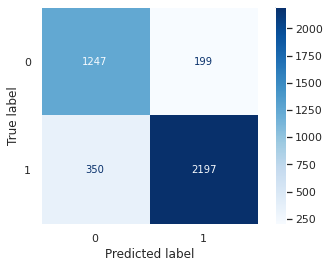

In [71]:
rf = RandomForestClassifier()
rf.fit(Xtrain_tfidf,ytrain)
p5=rf.predict(Xtest_tfidf)
s5=accuracy_score(ytest,p4)
print("Random Forest Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p5))

Decision Tree Accuracy : 86.25%
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1446
           1       0.85      0.87      0.86      2547

    accuracy                           0.82      3993
   macro avg       0.80      0.80      0.80      3993
weighted avg       0.82      0.82      0.82      3993



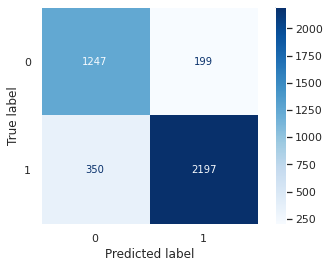

In [72]:
rf = DecisionTreeClassifier()
rf.fit(Xtrain_tfidf,ytrain)
p6=rf.predict(Xtest_tfidf)
s6=accuracy_score(ytest,p4)
print("Decision Tree Accuracy :", "{:.2f}%".format(100*s6))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p6))

In [73]:
df

,content,score,review,polarity,subjectivity,sentiment
0,very good plateform,5,good plateform,0.91,0.78,1
1,good but not nice,4,good nice,0.20,0.80,1
2,great app for making new connections.finding jobs specially if you are experienced and a lot of knowledge exchange.,5,great app making new connectionsfinding jobs specially experienced lot knowledge exchange,0.52,0.67,1
3,great for work,5,great work,0.80,0.75,1
4,"if i could give it a million negative stars i would. i tried to re-enter the workforce after disability. a legitimate account that had been hacked offered me a job. i ended up losing my entire bank account and have had no money, scrambling even more for a job than before. maybe vet the posted jobs better? connected support as instructed, it was beyond not helpful.",1,million negative stars would tried reenter workforce disability legitimate account hacked offered job ended losing entire bank account money scrambling job before maybe vet posted jobs better connected support instructed helpful,0.17,0.51,1
...,...,...,...,...,...,...
19995,"too many connection errors. no connection on some networks, when other messengers work. too many notifications.",3,connection errors connection networks messengers work notifications,0.29,0.46,1
19996,its uses lots of data but not run properly very slow app other app runs good but it run very slow it loaded slow videos and content youtube runs good no buffering but it is having lots of buffering thats why i m not using it frequently very disappointing app now i am thinking why i had made profile on it,1,uses lots data run properly slow app app runs good run slow loaded slow videos content youtube runs good buffering lots buffering thats frequently disappointing app thinking profile,-0.08,0.56,0
19997,"access to linkedin at my fingertips. what's not to like, except maybe a lower price on their 'premium' account. if it costs more than a netflix subscription, i'm not buying.",4,access linkedin fingertips whats like maybe lower price premium account costs netflix subscription im buying,0.50,0.50,1
19998,"a decent professional platform, that shouldn't fall for gimmicks like recording videos etc to sell better",5,decent professional platform fall gimmicks like recording videos etc sell better,0.26,0.42,1


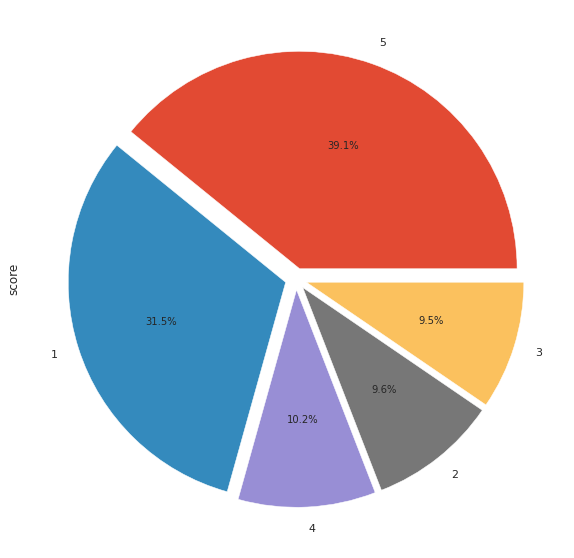

In [74]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
df['score'].value_counts().plot(kind = 'pie', figsize = (10,10), autopct ='%1.1f%%', explode=explode)

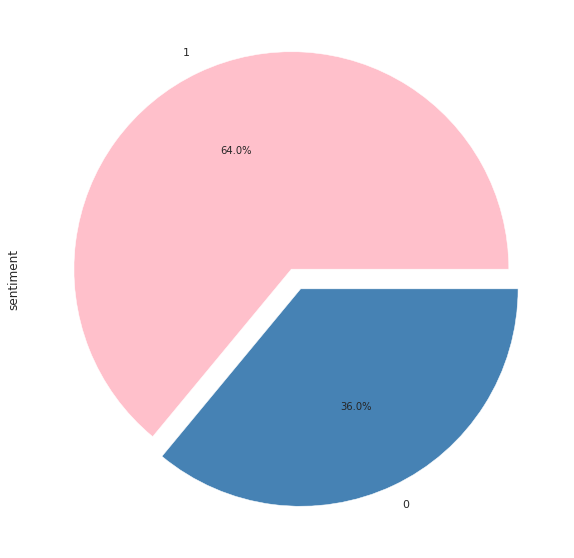

In [75]:
explode = (0.05, 0.05)
colors = ['pink', 'steelblue']
df['sentiment'].value_counts().plot(kind = 'pie', figsize = (10,10), autopct ='%1.1f%%', explode=explode, colors=colors)